In [75]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import geopandas as gpd


In [76]:
df = pd.read_csv("/Users/adrianamenjivar/Downloads/Crime_Data_2010_2017.csv")

In [77]:
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [78]:
# Step 1: Get % of missing values for each column
missing_percent = df.isnull().mean() * 100  # gives % instead of count

# Step 2: Filter to keep only columns with less than 30% missing
columns_to_keep = missing_percent[missing_percent < 30].index #.index gives you the labels (names) of the items that passed your condition.

# Step 3: Create a new DataFrame with only those columns
df_cleaned = df[columns_to_keep]

# Optional: Check what you kept
print(df_cleaned.columns)


Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Address', 'Location '],
      dtype='object')


In [79]:
# Step 1: Calculate % missing
missing_percent = df.isnull().mean() * 100

# Step 2: Only keep columns with less than 90% missing
columns_to_keep = missing_percent[missing_percent > 90].index

# Step 3: Create a cleaned dataframe
df_cleaned = df[columns_to_keep]

# Check columns you kept
print(df_cleaned.columns)

#These have over 90% of their data missing. keep column only if need


Index(['Crime Code 2', 'Crime Code 3', 'Crime Code 4'], dtype='object')


In [80]:
cols_to_drop = ['Crime Code 2', 'Crime Code 3', 'Crime Code 4']

In [81]:
df = df.drop(columns=cols_to_drop)
#reset df and drop

In [82]:
df.isnull().sum().sort_values(ascending=False)

#checking for missing values

Cross Street              1321583
Weapon Description        1059560
Weapon Used Code          1059559
MO Codes                   171759
Victim Descent             145232
Victim Sex                 145199
Victim Age                 128659
Premise Description          2751
Crime Code Description        412
Premise Code                   76
Location                        9
Crime Code 1                    7
Status Code                     2
Date Reported                   0
Crime Code                      0
Reporting District              0
Area Name                       0
Area ID                         0
Time Occurred                   0
Status Description              0
Address                         0
Date Occurred                   0
DR Number                       0
dtype: int64

In [83]:
df.dtypes

DR Number                   int64
Date Reported              object
Date Occurred              object
Time Occurred               int64
Area ID                     int64
Area Name                  object
Reporting District          int64
Crime Code                  int64
Crime Code Description     object
MO Codes                   object
Victim Age                float64
Victim Sex                 object
Victim Descent             object
Premise Code              float64
Premise Description        object
Weapon Used Code          float64
Weapon Description         object
Status Code                object
Status Description         object
Crime Code 1              float64
Address                    object
Cross Street               object
Location                   object
dtype: object

In [84]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#reformating column names 


In [85]:
df.columns.tolist()

['dr_number',
 'date_reported',
 'date_occurred',
 'time_occurred',
 'area_id',
 'area_name',
 'reporting_district',
 'crime_code',
 'crime_code_description',
 'mo_codes',
 'victim_age',
 'victim_sex',
 'victim_descent',
 'premise_code',
 'premise_description',
 'weapon_used_code',
 'weapon_description',
 'status_code',
 'status_description',
 'crime_code_1',
 'address',
 'cross_street',
 'location']

In [86]:
df['location'].head(10)
#trying to see how its formatted in the columns

0    (33.9829, -118.3338)
1    (34.0454, -118.3157)
2     (33.942, -118.2717)
3    (33.9572, -118.2717)
4    (34.2009, -118.6369)
5    (34.0591, -118.2412)
6    (34.1211, -118.2048)
7     (34.241, -118.3987)
8    (34.3147, -118.4589)
9    (34.2012, -118.4662)
Name: location, dtype: object

1. Some of the data columns (like 'date_occurred') might look like dates but are actually just text. This turns them into real datetime objects that Python can work with (like sorting or filtering by date).
- errors='coerce' means: If it finds a weird date it can’t understand, it will replace it with NaT (like NaN but for dates).

2. Fix number columns (turn floats into integers)
- Some of the number columns have missing values (NaN) and might be in decimal format (floats), even though they should be whole numbers (integers). fillna(-1) replaces missing values with -1 so we can turn the whole column into integers using .astype(int).
We use -1 because it clearly stands for “unknown” and isn’t a valid age, code, etc.

3. Clean and fix text columns
- If 'victim_sex' or 'victim_descent' is missing → fill it with "Unknown".

- .str.strip() removes extra spaces.

- .str.upper() turns everything into ALL CAPS so the data is consistent.

- .str.title() makes things look nice: "THEFT - PETTY" → "Theft - Petty".

- .fillna('Unknown') fills in any missing values.

- .str.strip() removes weird leading/trailing spaces that mess up matching.



In [87]:
# Step 1: Convert date strings to real datetime objects
df['date_occurred'] = pd.to_datetime(df['date_occurred'], errors='coerce') # coerce= just replace it with NaT (Not a Time) instead of crashing or giving an error."
df['date_reported'] = pd.to_datetime(df['date_reported'], errors='coerce')

# Step 2: Fix float columns by filling NaNs with -1 and converting to int
df['victim_age'] = df['victim_age'].fillna(-1).astype(int)
df['premise_code'] = df['premise_code'].fillna(-1).astype(int)
df['weapon_used_code'] = df['weapon_used_code'].fillna(-1).astype(int)
df['crime_code_1'] = df['crime_code_1'].fillna(-1).astype(int)

# Step 3: Clean up text formatting and fill text-based missing values
df['victim_sex'] = df['victim_sex'].fillna('Unknown').str.strip().str.upper()
df['victim_descent'] = df['victim_descent'].fillna('Unknown').str.strip().str.upper()
df['crime_code_description'] = df['crime_code_description'].str.strip().str.title()
df['premise_description'] = df['premise_description'].fillna('Unknown').str.strip().str.title()
df['weapon_description'] = df['weapon_description'].fillna('Unknown').str.strip().str.title()
df['cross_street'] = df['cross_street'].fillna('Unknown').str.strip()


In [88]:
df.isnull().sum().sort_values(ascending=False)


mo_codes                  171759
crime_code_description       412
location                       9
status_code                    2
premise_code                   0
cross_street                   0
address                        0
crime_code_1                   0
status_description             0
weapon_description             0
weapon_used_code               0
premise_description            0
dr_number                      0
victim_descent                 0
date_reported                  0
victim_age                     0
crime_code                     0
reporting_district             0
area_name                      0
area_id                        0
time_occurred                  0
date_occurred                  0
victim_sex                     0
dtype: int64

In [90]:
# 1. mo_codes — fill with "Unknown"
df['mo_codes'] = df['mo_codes'].fillna('Unknown')

# 2. crime_code_description — fill missing, clean formatting
df['crime_code_description'] = df['crime_code_description'].fillna('Unknown').str.strip().str.title()

# 3. location — fill with "Unknown" and strip extra spaces
df['location'] = df['location'].astype(str).fillna('Unknown').replace('nan', 'Unknown').str.strip()

# 4. status_code — fill with "Unknown" and standardize text
df['status_code'] = df['status_code'].fillna('Unknown').str.strip().str.upper()

#.str.strip() = Remove any extra spaces at the beginning or end of the text - " Theft "	- to "Theft"
# astype(str) = turning everything into a string .. .fillna('Unknown') = If the value is missing (NaN), put 'Unknown' 
# .replace('nan', 'Unknown') = If any values literally say 'nan' as a string, also make that 'Unknown' 
#upper makes everything upper case

In [91]:
df.columns.tolist()

['dr_number',
 'date_reported',
 'date_occurred',
 'time_occurred',
 'area_id',
 'area_name',
 'reporting_district',
 'crime_code',
 'crime_code_description',
 'mo_codes',
 'victim_age',
 'victim_sex',
 'victim_descent',
 'premise_code',
 'premise_description',
 'weapon_used_code',
 'weapon_description',
 'status_code',
 'status_description',
 'crime_code_1',
 'address',
 'cross_street',
 'location']

In [92]:
df.isnull().sum().sort_values(ascending=False)


dr_number                 0
victim_descent            0
cross_street              0
address                   0
crime_code_1              0
status_description        0
status_code               0
weapon_description        0
weapon_used_code          0
premise_description       0
premise_code              0
victim_sex                0
date_reported             0
victim_age                0
mo_codes                  0
crime_code_description    0
crime_code                0
reporting_district        0
area_name                 0
area_id                   0
time_occurred             0
date_occurred             0
location                  0
dtype: int64

# Explore Basic Patterns


<Axes: title={'center': 'Crimes per Year'}, xlabel='year'>

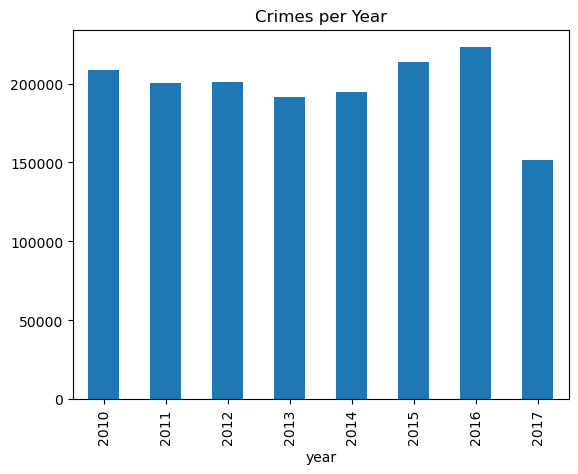

In [93]:
# Crimes per year

df['year'] = df['date_occurred'].dt.year # pulling just the year out of date_occured '2023-06-23 = 	2023'
df['month'] = df['date_occurred'].dt.month # pulling from date_occured only month so '2023-06-23 = 06 '
df['hour'] = df['time_occurred'].astype(str).str.zfill(4).str[:2].astype(int) 
# bc hour can be formatted diff for all, asttype turns it string - now,  we can slice and play with a string
# .str.zfill(4) — adds zeros in front so it’s always 4 digits - 03? = 0030
# .str[:2] = This grabs the first two characters from the left. | "0845" → "08" This is the hour, as a string 
# .astype(int) = Turn those strings into numbers

# these are three independt columns that were altering right
#so when we call year its bc theyre altered but we want to see x axis year by  numeber of crimes crimes.
# we can absolutley change it to month or hour to show crimes per month or hour.

df['year'].value_counts().sort_index().plot(kind='bar', title='Crimes per Year')


In [50]:
df['year'].value_counts(sort=True)

year
2016    223038
2015    213910
2010    208576
2012    200797
2011    200176
2014    194469
2013    191764
2017    151586
Name: count, dtype: int64

Between 2010 and 2016, reported crime in Los Angeles remained fairly consistent, averaging around 205,000 incidents per year.

2016 marked the highest point in this period, with over 223,000 crimes, a notable increase compared to the prior 3 years.

2017 showed a dramatic drop, down to 151,586, which is a 32% decrease from 2016.

From 2010–2014, crime slowly declined year over year. Then in 2015 and 2016, reports surged again—possibly due to changes in policy, enforcement focus, or public reporting.

The sudden drop in 2017 could reflect a variety of factors, including changes in data collection, reporting definitions, or actual crime reduction efforts.

# What were the top 10 most reported crime types?
# Did violent crimes increase or decrease from 2010–2017?

In [51]:
df['crime_code_description'].value_counts().head(10)


crime_code_description
Battery - Simple Assault                                        145767
Vehicle - Stolen                                                121329
Burglary From Vehicle                                           121318
Burglary                                                        114751
Theft Plain - Petty ($950 & Under)                              113709
Theft Of Identity                                               100653
Intimate Partner - Simple Assault                                85908
Vandalism - Felony ($400 & Over, All Church Vandalisms) 0114     79433
Vandalism - Misdeameanor ($399 Or Under)                         71523
Assault With Deadly Weapon, Aggravated Assault                   67631
Name: count, dtype: int64

In [95]:
df.groupby(['year', 'crime_code_description']).size()

year  crime_code_description                        
2010  Arson                                               331
      Assault With Deadly Weapon On Police Officer        158
      Assault With Deadly Weapon, Aggravated Assault     8348
      Attempted Robbery                                  1363
      Battery - Simple Assault                          20519
                                                        ...  
2017  Vehicle - Stolen                                  12717
      Violation Of Court Order                           1201
      Violation Of Restraining Order                     1607
      Violation Of Temporary Restraining Order            179
      Weapons Possession/Bombing                           12
Length: 1002, dtype: int64

In [96]:
df.groupby(['year', 'crime_code_description']).size().unstack().fillna(0)
# size = Count how many rows are in each group.
# .unstack() =  truns it into columns
# .fillna(0) = fills NaN with 0 

crime_code_description,Abortion/Illegal,Arson,Assault With Deadly Weapon On Police Officer,"Assault With Deadly Weapon, Aggravated Assault",Attempted Robbery,Battery - Simple Assault,Battery On A Firefighter,Battery Police (Simple),Battery With Sexual Contact,"Beastiality, Crime Against Nature Sexual Asslt With Anim0065",...,Unauthorized Computer Access,Unknown,"Vandalism - Felony ($400 & Over, All Church Vandalisms) 0114",Vandalism - Misdeameanor ($399 Or Under),Vehicle - Attempt Stolen,Vehicle - Stolen,Violation Of Court Order,Violation Of Restraining Order,Violation Of Temporary Restraining Order,Weapons Possession/Bombing
year,,,,,,,,,,,,,,,,,,,,,
2010,0.0,331.0,158.0,8348.0,1363.0,20519.0,13.0,460.0,1038.0,2.0,...,92.0,7.0,10043.0,9934.0,346.0,16654.0,2607.0,1414.0,61.0,28.0
2011,0.0,335.0,197.0,7920.0,1267.0,19902.0,16.0,451.0,1016.0,1.0,...,119.0,0.0,8751.0,10354.0,315.0,15163.0,2493.0,1382.0,60.0,17.0
2012,0.0,303.0,128.0,7530.0,1132.0,19815.0,22.0,414.0,1030.0,1.0,...,98.0,5.0,9031.0,9773.0,330.0,14821.0,2209.0,1525.0,67.0,15.0
2013,3.0,316.0,128.0,7010.0,979.0,18924.0,17.0,355.0,946.0,6.0,...,98.0,7.0,8954.0,9076.0,284.0,13938.0,1955.0,1760.0,91.0,12.0
2014,0.0,300.0,150.0,8319.0,1005.0,18404.0,38.0,457.0,1085.0,4.0,...,107.0,10.0,9691.0,9103.0,257.0,13693.0,2190.0,1962.0,118.0,16.0
2015,0.0,359.0,183.0,10200.0,1127.0,17580.0,52.0,454.0,1050.0,3.0,...,144.0,47.0,11573.0,8476.0,348.0,16046.0,1590.0,1749.0,195.0,18.0
2016,0.0,411.0,187.0,10788.0,1230.0,17922.0,38.0,476.0,1099.0,1.0,...,179.0,192.0,12746.0,8802.0,432.0,18297.0,1808.0,2082.0,249.0,16.0
2017,0.0,276.0,127.0,7516.0,906.0,12701.0,27.0,383.0,789.0,1.0,...,125.0,144.0,8644.0,6005.0,233.0,12717.0,1201.0,1607.0,179.0,12.0


In [101]:
df['crime_code_description'].unique()

#figure out which of these go under violent crime 

array(['Intimate Partner - Simple Assault', 'Vehicle - Stolen',
       'Vandalism - Misdeameanor ($399 Or Under)', 'Criminal Homicide',
       'Embezzlement, Grand Theft ($950.01 & Over)',
       'Theft Plain - Petty ($950 & Under)', 'Stalking',
       'Shoplifting - Petty Theft ($950 & Under)',
       'Battery - Simple Assault',
       'Embezzlement, Petty Theft ($950 & Under)',
       'Document Forgery / Stolen Felony', 'Bike - Stolen', 'Robbery',
       'Sodomy/Sexual Contact B/W Penis Of One Pers To Anus Oth 0007=02',
       'Attempted Robbery', 'Resisting Arrest', 'Trespassing',
       'Theft-Grand ($950.01 & Over)Excpt,Guns,Fowl,Livestk,Prod0036',
       'Counterfeit', 'Assault With Deadly Weapon, Aggravated Assault',
       'Throwing Object At Moving Vehicle',
       'Defrauding Innkeeper/Theft Of Services, $400 & Under',
       'Criminal Threats - No Weapon Displayed',
       'Vandalism - Felony ($400 & Over, All Church Vandalisms) 0114',
       'Burglary From Vehicle', 'Batter

# Did violent crimes increase or decrease from 2010–2017?

In [104]:
violent_crimes = [
    'Criminal Homicide',
    'Rape, Forcible',
    'Rape, Attempted',
    'Sodomy/Sexual Contact B/W Penis Of One Pers To Anus Oth 0007=02',
    'Sexual Pentration With A Foreign Object',
    'Battery - Simple Assault',
    'Battery Police (Simple)',
    'Battery With Sexual Contact',
    'Assault With Deadly Weapon, Aggravated Assault',
    'Assault With Deadly Weapon On Police Officer',
    'Intimate Partner - Aggravated Assault',
    'Child Abuse (Physical) - Simple Assault',
    'Child Abuse (Physical) - Aggravated Assault',
    'Robbery',
    'Attempted Robbery',
    'Kidnapping',
    'False Imprisonment',
    'Manslaughter, Negligent'
]
# create a list of all the violent crimes you want to see! helps us filter the data to visualize 


df_violent = df[
    (df['year'] >= 2010) & 
    (df['year'] <= 2017) & 
    (df['crime_code_description'].isin(violent_crimes))
]
# make a variable where were telling python to only keep rows where the year is between 2010 and 2017 
# AND the crime is one of the violent ones
# then we run our list in crime_code_decription to make sure we pull those exact ones

In [107]:
violent_counts = df_violent.groupby('year').size()
violent_counts
#How many violent crimes happened each year?

year
2010    44977
2011    42565
2012    41100
2013    38260
2014    40329
2015    43876
2016    46588
2017    32870
dtype: int64

<Axes: title={'center': 'Violent Crimes from 2010 to 2017'}, xlabel='year'>

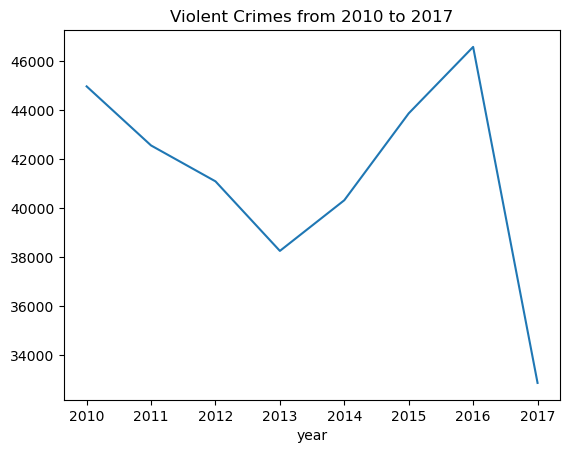

In [109]:
violent_counts.plot(kind='line', title='Violent Crimes from 2010 to 2017')
#plot to see the trend 

In [112]:
print("2010:", violent_counts.loc[2010])
print("2017:", violent_counts.loc[2017])
# compare start and end

# def more in 2010. 

2010: 44977
2017: 32870


# Battery - Simple Assault or Vehicle - Stolen changed over the years 

<Axes: title={'center': 'Battery - Simple Assault Over Time'}, xlabel='year'>

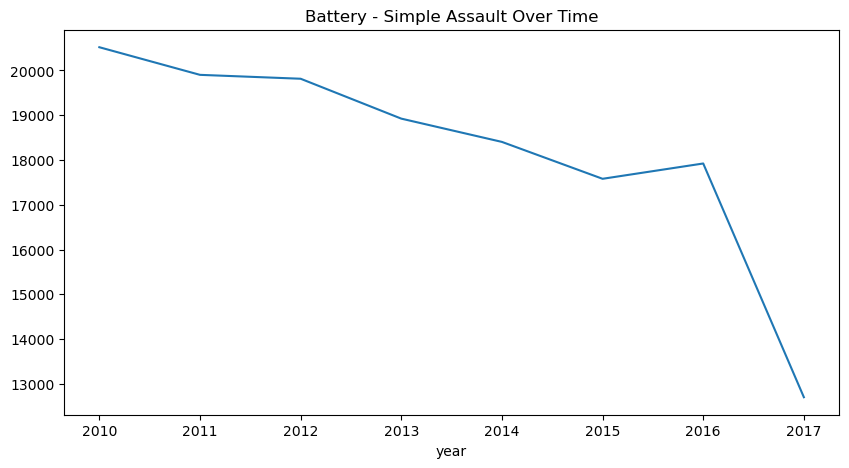

In [57]:
crime_trends['Battery - Simple Assault'].plot(title='Battery - Simple Assault Over Time', figsize=(10, 5))


<Axes: title={'center': 'Top Crime Types Over Time'}, xlabel='year'>

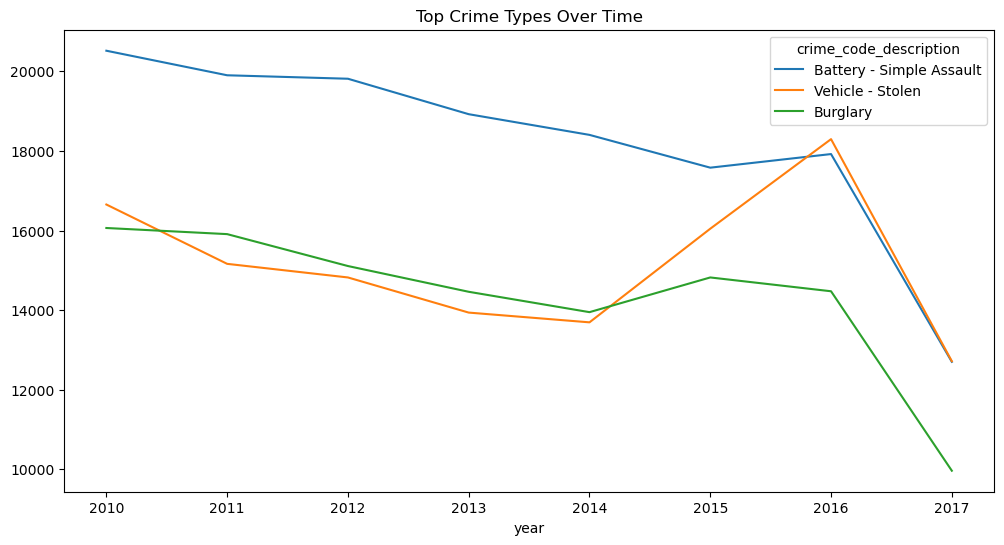

In [58]:
crime_trends[['Battery - Simple Assault', 'Vehicle - Stolen', 'Burglary']].plot(figsize=(12,6), title='Top Crime Types Over Time')


In [113]:
#increased / decreased the most 
pct_change = ((crime_trends.loc[2017] - crime_trends.loc[2010]) / crime_trends.loc[2010]) * 100
pct_change.sort_values(ascending=False).round(1)

# math inorder to see the % Change (2010 → 2017) so the first one went 10% down, etc if it was positive then that means it went up aka increased.
#The biggest drop was in Burglary: 38% fewer incidents.

crime_code_description
Assault With Deadly Weapon, Aggravated Assault                 -10.0
Vandalism - Felony ($400 & Over, All Church Vandalisms) 0114   -13.9
Theft Plain - Petty ($950 & Under)                             -14.4
Intimate Partner - Simple Assault                              -17.2
Vehicle - Stolen                                               -23.6
Burglary From Vehicle                                          -31.8
Burglary                                                       -38.0
Battery - Simple Assault                                       -38.1
Vandalism - Misdeameanor ($399 Or Under)                       -39.6
Theft Of Identity                                              -45.1
dtype: float64

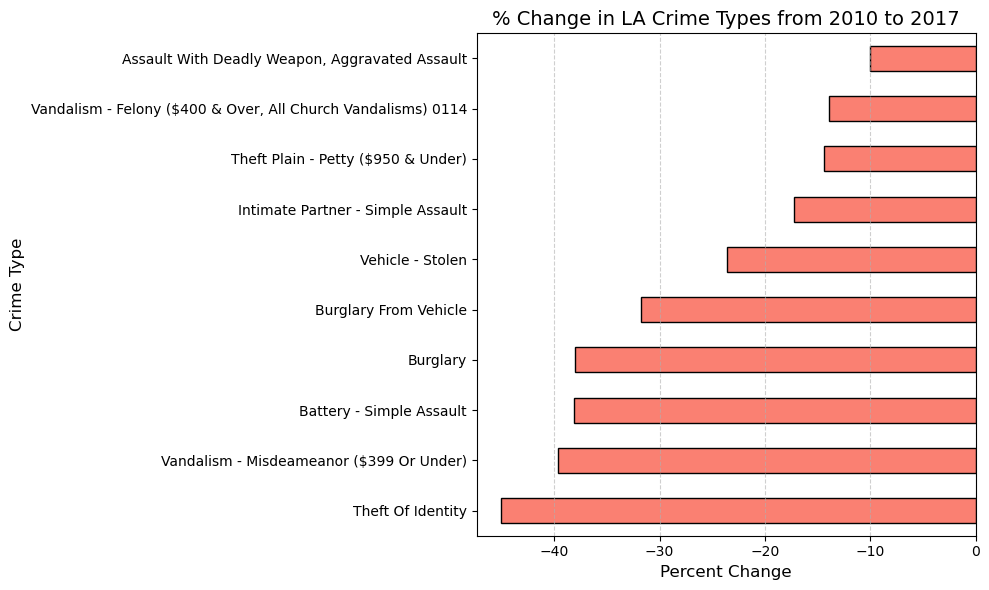

In [115]:
# Plot

# Get top 10 decreases (or increases if ascending=False)
top_drops = pct_change.sort_values().head(10).round(1)

# from the new column top_drops = sort it low to high,  grab top ten , then round numbers to 1 decimal place


plt.figure(figsize=(10, 6)) #10 inches wide by 6 inches tall.

top_drops.plot(kind='barh', color='salmon', edgecolor='black')
# kind='barh' = horizontal bar chart....... color='salmon' = makes the bars a pink/red color
# edgecolor='black' = puts a black outline on the bars

plt.title('% Change in LA Crime Types from 2010 to 2017', fontsize=14) #gives title

plt.xlabel('Percent Change', fontsize=12) #labels x axis

plt.ylabel('Crime Type', fontsize=12) #labels y axis

plt.grid(axis='x', linestyle='--', alpha=0.6) # Adds dashed gridlines on the x-axis to make the chart easier to read.


plt.tight_layout() # tight_layout() = auto-adjusts spacing so nothing overlaps
plt.show()


# this is Showing the 10 crime types with the biggest percentage decrease from 2010 to 2017 in a horizontal bar chart

Among the top crime types in Los Angeles between 2010 and 2017, Theft of Identity experienced the sharpest decline, dropping by 45.1%. Other high-frequency crimes such as Battery – Simple Assault, Burglary, and Vehicle Theft also saw major reductions, with declines ranging from 23% to 39%. This trend may reflect improved personal data security, community awareness, or shifts in crime patterns and law enforcement strategy.



# Rank top 5 crime each year

In [116]:
for year in crime_trends.index: # Go through each row (each year) in the table one by one

    
    print(f"\nTop 5 Crimes in {year}:") # {year} this is a variable — it gets replaced with the actual year during the loop.
    #“Print a headline for each year with a blank line before it, and plug in the actual year.”

    
    print(crime_trends.loc[year].sort_values(ascending=False).head(5))
    # “Give me the row for the years .
    # Sort these from largest to smallest.
    



Top 5 Crimes in 2010:
crime_code_description
Battery - Simple Assault    20519
Burglary From Vehicle       17683
Vehicle - Stolen            16654
Burglary                    16064
Theft Of Identity           13128
Name: 2010, dtype: int64

Top 5 Crimes in 2011:
crime_code_description
Battery - Simple Assault              19902
Burglary                              15910
Burglary From Vehicle                 15882
Vehicle - Stolen                      15163
Theft Plain - Petty ($950 & Under)    14637
Name: 2011, dtype: int64

Top 5 Crimes in 2012:
crime_code_description
Battery - Simple Assault              19815
Theft Plain - Petty ($950 & Under)    16096
Burglary From Vehicle                 15911
Burglary                              15108
Vehicle - Stolen                      14821
Name: 2012, dtype: int64

Top 5 Crimes in 2013:
crime_code_description
Battery - Simple Assault              18924
Theft Plain - Petty ($950 & Under)    16101
Burglary From Vehicle                 15500

# Trend over Time

<Axes: title={'center': 'Top 10 Crimes per Year'}, xlabel='year'>

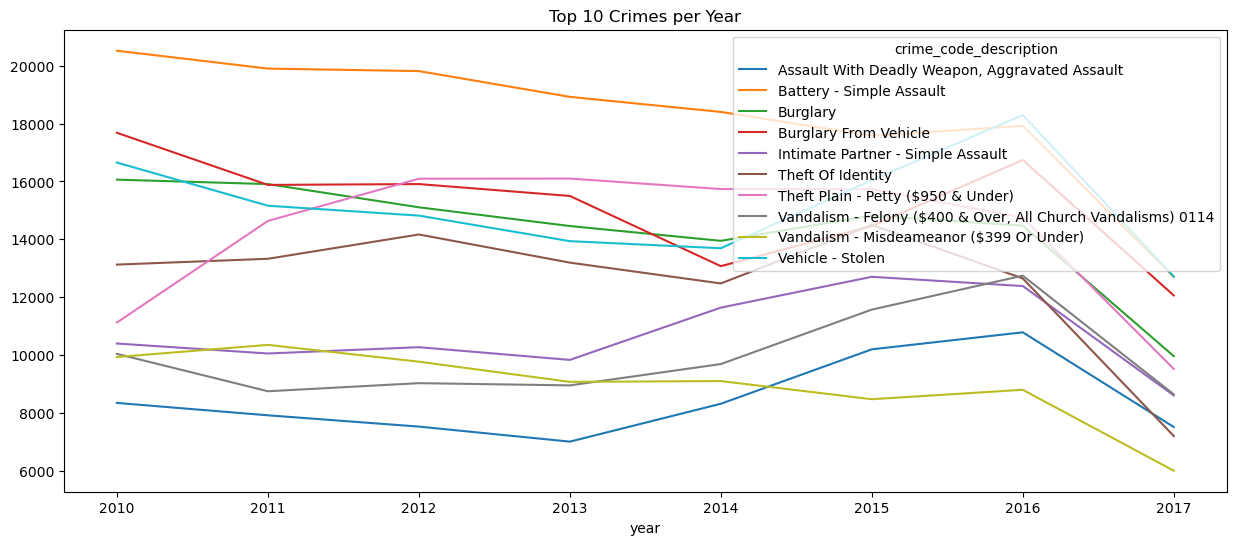

In [118]:
top_crimes = [
    'Battery - Simple Assault',
    'Vehicle - Stolen',
    'Burglary From Vehicle',
    'Burglary',
    'Theft Plain - Petty ($950 & Under)',
    'Theft Of Identity',
    'Intimate Partner - Simple Assault',
    'Vandalism - Felony ($400 & Over, All Church Vandalisms) 0114',
    'Vandalism - Misdeameanor ($399 Or Under)',
    'Assault With Deadly Weapon, Aggravated Assault'
] # make a list of the top crimes 



# Group by year and crime type
crime_trends = (
    df[df['crime_code_description'].isin(top_crimes)] # from  top_crimes pull those in crime_code_decription out 
    .groupby(['year', 'crime_code_description']) # now group those crimes by year and count how many times in crime_code_description
    .size() # show how many times 
    .unstack(fill_value=0) #turn to a table 
)

crime_trends.plot(figsize=(15,6), title='Top 10 Crimes per Year')


# By area

In [55]:
df[df['crime_code_description'].isin(top_crimes)]\ 
   .groupby(['area_name', 'crime_code_description'])\
   .size().unstack(fill_value=0).sort_values(by='Battery - Simple Assault', ascending=False).head(10)


crime_code_description,"Assault With Deadly Weapon, Aggravated Assault",Battery - Simple Assault,Burglary,Burglary From Vehicle,Intimate Partner - Simple Assault,Theft Of Identity,Theft Plain - Petty ($950 & Under),"Vandalism - Felony ($400 & Over, All Church Vandalisms) 0114",Vandalism - Misdeameanor ($399 Or Under),Vehicle - Stolen
area_name,,,,,,,,,,
77th Street,8959,12208,7790,5866,7146,5146,5275,4849,5361,9831
Southwest,5501,11196,6920,6026,5624,5174,9730,4383,4825,7085
Central,3832,10382,1977,4751,2845,1729,7532,2586,2913,2519
Southeast,5833,9086,6735,3955,7064,2898,3962,3057,5159,8091
Olympic,2694,8532,4256,5689,3891,4034,4245,3498,2903,4981
Hollywood,2738,7986,3491,6915,3238,4384,6787,4040,3179,3868
Newton,5229,7427,3978,5340,4453,2268,4071,3264,3351,8643
Rampart,3772,7193,2930,4782,5574,3130,3815,3323,2967,4719
Mission,3183,7136,5310,5993,5049,5978,4276,4571,3473,7477


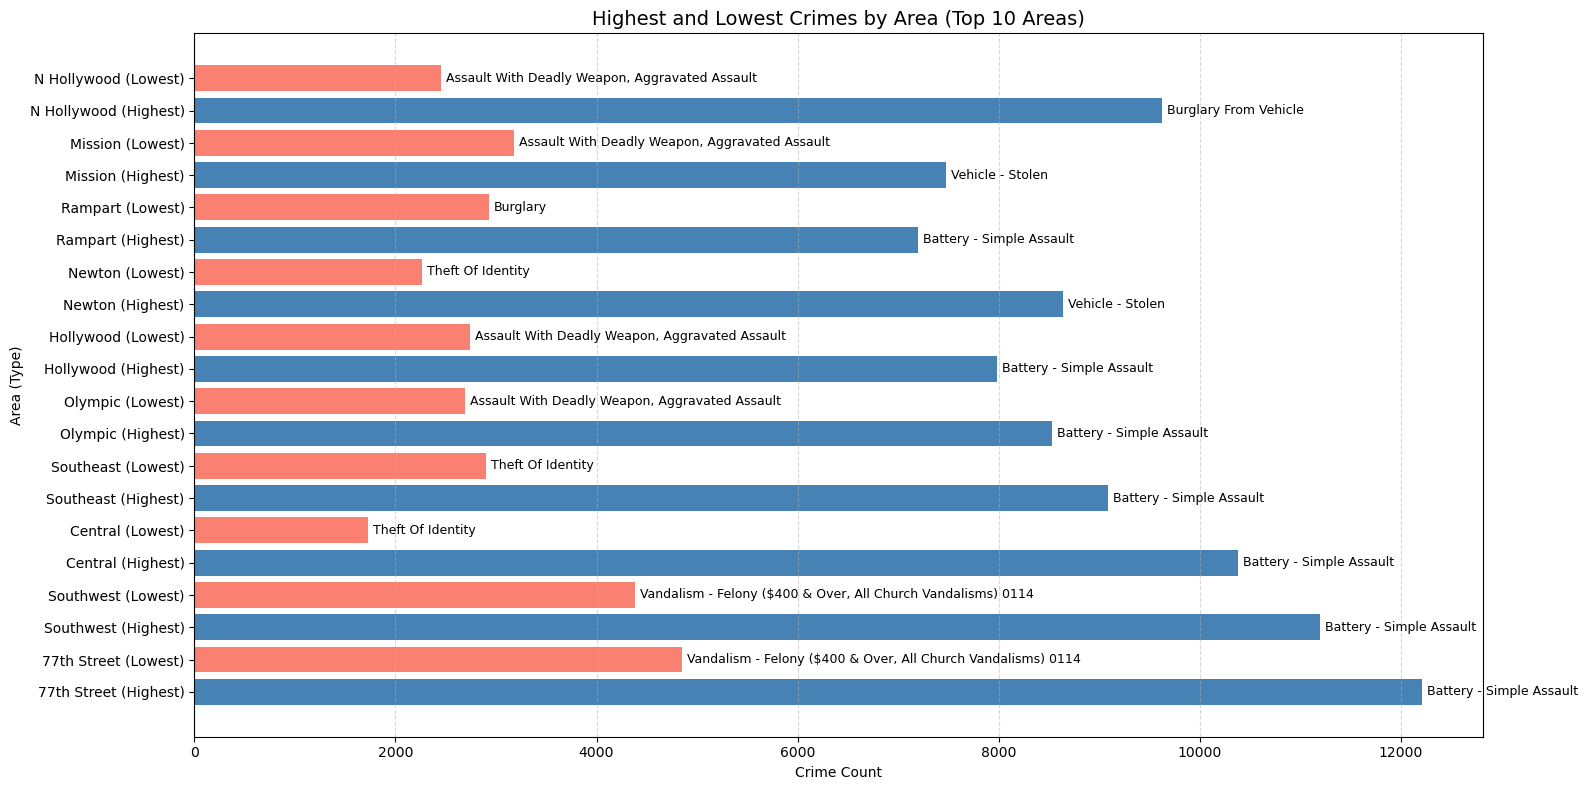

In [73]:

# Step 1: Get the grouped crime data
top_crimes = [
    'Battery - Simple Assault',
    'Vehicle - Stolen',
    'Burglary From Vehicle',
    'Burglary',
    'Theft Plain - Petty ($950 & Under)',
    'Theft Of Identity',
    'Intimate Partner - Simple Assault',
    'Vandalism - Felony ($400 & Over, All Church Vandalisms) 0114',
    'Vandalism - Misdeameanor ($399 Or Under)',
    'Assault With Deadly Weapon, Aggravated Assault'
]

grouped = df[df['crime_code_description'].isin(top_crimes)]\
    .groupby(['area_name', 'crime_code_description'])\
    .size().unstack(fill_value=0)

top10_areas = grouped.sort_values(by='Battery - Simple Assault', ascending=False).head(10)

# Step 2: Build a summary of highest/lowest crimes for each area
summary_data = []

for area in top10_areas.index:
    area_data = top10_areas.loc[area]
    highest_crime = area_data.idxmax()
    highest_count = area_data.max()
    lowest_crime = area_data.idxmin()
    lowest_count = area_data.min()
    
    summary_data.append({
        'Area': area,
        'Type': 'Highest',
        'Crime': highest_crime,
        'Count': highest_count
    })
    summary_data.append({
        'Area': area,
        'Type': 'Lowest',
        'Crime': lowest_crime,
        'Count': lowest_count
    })

summary_df = pd.DataFrame(summary_data)

# Step 3: Create the bar plot
plt.figure(figsize=(16, 8))
colors = {'Highest': 'steelblue', 'Lowest': 'salmon'}

for i, row in summary_df.iterrows():
    plt.barh(f"{row['Area']} ({row['Type']})", row['Count'], color=colors[row['Type']])
    plt.text(row['Count'] + 50, i, row['Crime'], va='center', fontsize=9)

plt.title('Highest and Lowest Crimes by Area (Top 10 Areas)', fontsize=14)
plt.xlabel('Crime Count')
plt.ylabel('Area (Type)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
